In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df= pd.read_csv(r'C:\Users\acer\Desktop\Data set\tweets.csv', encoding = 'ISO-8859-1')

In [4]:
df.head(2)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False


In [ ]:
df.iloc[1,2]

In [ ]:
# 2. Generating Word Frequency
# Let's first generate a frequency table of all the words present in all the tweets combined.

In [7]:
def gen_fre(text):    
    a =[]
    for t in text.split():
            a.extend(t)
    word_freq= pd.Series(a).value_counts()
#     word_freq[:20]
    return word_freq

gen_fre(df.text.str)

RT                 11053
to                  7650
is                  5152
in                  4491
the                 4331
                   ...  
@vishwa_theking        1
#Black                 1
11/                    1
corporator             1
ABCD                   1
Length: 19601, dtype: int64

In [ ]:
#  EDA using Word Clouds
# Now that you have succesfully created a frequency table, you can use that to create multiple visualizations in the form of word clouds. Sometimes, the quickest way to understand the context of the text data is using a word cloud of top 100-200 words. Let's see how to create that in Python.

# Note:- You'll use the WordCloud library of Python. You can install it by -

# pip install wordcloud

In [1]:
from wordcloud import WordCloud

In [11]:
#Generate word frequencies
word_freq = gen_fre(df.text.str)

In [28]:
#Generate word cloud
wc= WordCloud(height=330, max_words=500, background_color='black').generate_from_frequencies(word_freq)


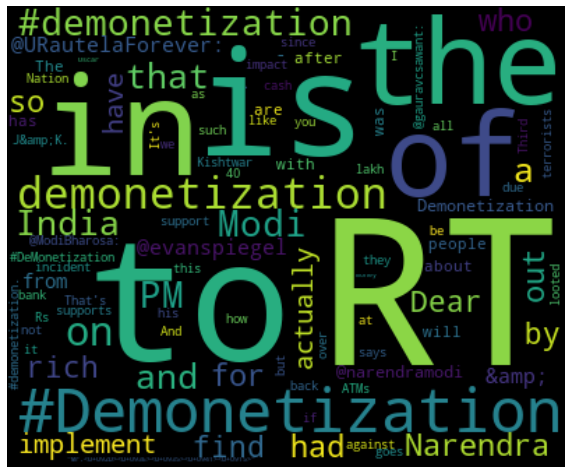

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#text cleaning

In [27]:
import re

In [30]:
def clean_text(text):
    text = re.sub(r'RT', '', text)
    
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

In [31]:
from wordcloud import STOPWORDS

print(STOPWORDS)

{'more', "mustn't", 'ever', "where's", "we've", "shouldn't", "they'll", 'not', 'otherwise', 'once', 'can', 'what', "can't", 'else', 'on', 'that', 'have', "he's", 'doing', 'me', "she's", "he'd", 'nor', 'other', 'you', "when's", "we'll", 'himself', 'she', 'with', 'hers', 'be', 'r', 'their', 'had', 'www', 'very', 'myself', "she'd", 'each', 'same', 'above', 'its', 'than', 'being', "what's", "you'd", 'am', 'which', 'if', 'why', 'of', 'are', 'could', "we're", 'further', "haven't", 'so', 'before', 'should', 'such', "don't", 'through', 'until', 'most', 'just', 'your', 'below', 'ought', "aren't", 'yours', "we'd", 'whom', 'like', "they've", 'here', 'in', "here's", 'over', 'would', 'it', "you're", "how's", "i've", 'herself', 'ours', 'ourselves', 'both', 'were', "weren't", 'theirs', 'since', 'out', 'her', 'at', "it's", 'hence', 'between', "wasn't", 'or', 'does', 'however', 'when', 'has', 'did', 'after', "you'll", 'com', "you've", 'been', 'he', 'we', "won't", "doesn't", 'they', 'about', 'cannot', '

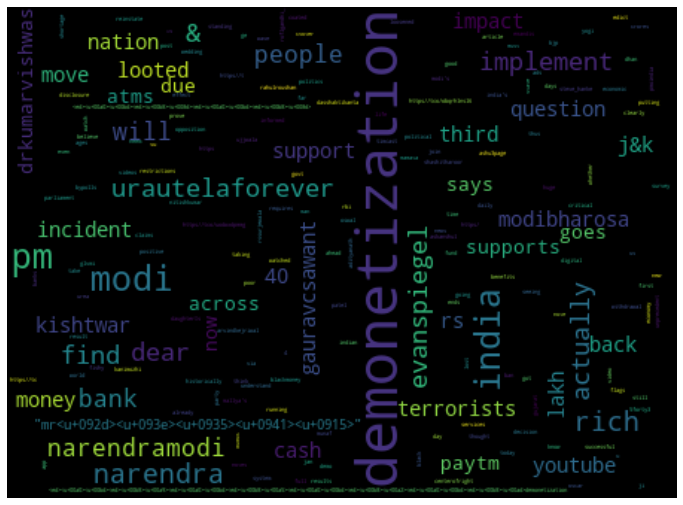

In [35]:
text = df.text.apply(lambda x: clean_text(x))
word_freq = gen_fre(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#bilinear makes the word cloud more smooth

In [40]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [43]:
text = "hi! this is a cat. This is a dog."

print(sent_tokenize(text))
word_tokenize(text)

['hi!', 'this is a cat.', 'This is a dog.']


['hi', '!', 'this', 'is', 'a', 'cat', '.', 'This', 'is', 'a', 'dog', '.']

In [ ]:
#stemmimg

In [61]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('played'))
print(stemmer.stem('Increasing'))

play
increas


In [54]:
#lemmetaization
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
print(lemm.lemmatize('played'))
print(lemm.lemmatize('increases'))

played
increase


In [62]:
print(lemm.lemmatize('increases', pos = 'v')) #pos = 'v' means part of speech is verb

increase


In [68]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [69]:
text = "hi! this is a cat. This is a dog."
tokens = word_tokenize(text)
pos_tag(tokens)

[('hi', 'NN'),
 ('!', '.'),
 ('this', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('cat', 'NN'),
 ('.', '.'),
 ('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('dog', 'NN'),
 ('.', '.')]

In [70]:
from nltk.corpus import wordnet

In [71]:
wordnet.synsets('computer')

[Synset('computer.n.01'), Synset('calculator.n.01')]

In [72]:
from nltk import ngrams

In [73]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [74]:
sentence = "i love to play"

In [81]:
n= 1
for gram in ngrams(word_tokenize(sentence), 1):
    print(gram)


('i',)
('love',)
('to',)
('play',)


In [95]:
# g = []
# for gram in ngrams(word_tokenize(sentence), 1):   to get a list of ngrams
#     g.append(gram)


In [96]:
# g

[('i',), ('love',), ('to',), ('play',)]

# DETECTING HATE SPEECH IN TWEETS

In [97]:
import pandas as pd

In [99]:
df = pd.read_csv(r'C:\Users\acer\Desktop\Data set\final_dataset_basicmlmodel.csv')

In [100]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
#data cleaning

In [108]:
import re

In [112]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\']',' ', text)
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text= text.lower()
    return(text)

In [113]:
df['clean_text'] = df.tweet.apply(lambda x: clean_text(x))

In [114]:
df.head(2)

,id,label,tweet,clean_text
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can't us...


In [ ]:
#feature Engineering

In [115]:
#generate word frequency
def gen_freq(text):
    word_list = []
    for tm in text.split():
        word_list.append(tm)
    word_freq = pd.Series(word_list).value_counts()
    word_freq = word_freq.drop(STOP_WORDS, errors = 'ignore')
    
    return(word_freq)